## Practical exercises. Part I

### Andrey Kravtsov

### The University of Chicago 

### email: kravtsov@uchicago.edu

Exercises in this notebook are aimed to help with your *qualitative* understanding of large-scale spatial distribution of galaxies and differences in distributions of galaxies of different morphological types based on the material presented during the first lecture. 

In [1]:
# Preliminaries: set up plotting parameters
import numpy as np

# setup notebook for inline figures
%matplotlib inline
import matplotlib.pyplot as plt

# setup matplotlib parameters to make nicer plots
from codes.plot_utils import plot_pretty

## Large-scale structure of galaxy distribution and galaxy bias

**Goals:** get a sense of large-scale structures in galaxy distribution and differences in spatial distribution of galaxies of different type. 


#### Data: SDSS galaxy data from the UPenn catalog

You should have downloaded UPenn version of the SDSS galaxy catalog (see <a href="bg01_required_software_data.ipynb">bg01_required_software_data</a>) and place the files in the <tt>data/</tt> subdirectory of the current directory, in which you are running this notebook. 

First, read SDSS galaxy catalog. The code below reproduces the code that reads in data and selects a region around the SDSS Great Wall - a huge filamentary structure in galaxy distribution discovered using the SDSS survey that spans hundreds of Mpc (<a href="https://iopscience.iop.org/article/10.1086/428890">Gott et al 2005</a>; see also <a href="https://iopscience.iop.org/article/10.1086/528986">Cowan & Ivezic 2008</a>). 

In [2]:
from codes.read_data import read_meert_catalog
# input phot_type selects photometry model fit:  1=best fit, 2=deVaucouleurs, 3=Sersic, 
# 4=DeVExp, 5=SerExp
datadir = r'data/Meert2015_v2/'
sdata, mdata, mnpdata, phot_r, mdatag, mnpdatag, morph = read_meert_catalog(datadir, phot_type=1)

670722 galaxies in Meert et al. sample initially


Select galaxies in the SDSS Great Wall region. 

In [3]:
# pre-select galaxies in the SDSS Great Wall region using RA, Dec, and redshift cuts
isel = ((sdata['dec'] > -7) & (sdata['dec'] < 7) & 
        (sdata['ra'] > 80) & (sdata['ra'] < 280) & 
        (sdata['z'] > 0.01) & (sdata['z'] < 0.14) )

#isel = ((sdata['dec'] > 13) & (sdata['dec'] < 25) & 
#        (sdata['ra'] > 170) & (sdata['ra'] < 190) & (sdata['z'] > 0.) & (sdata['z'] < 0.08) )

# extract data into numpy vectors for convenience
ram = sdata['ra'][isel]
zm = sdata['z'][isel]; mmeert = mdata['m_tot'][isel]
extm = mnpdata['extinction'][isel]; kcorr = mnpdata['kcorr'][isel]
# this selects probabilities to be of a Elliptical, S0, Sab, or Scd 
# morphology for each galaxy
pEll = morph['probaEll'][isel]; pS0  = morph['probaS0'][isel]; 
pSab = morph['probaSab'][isel]; pScd = morph['probaScd'][isel]; 


In [4]:
# luminosity distance in Mpc
from codes.cosmology import d_l

Om0 = 0.3; OmL = 1. - Om0
h = 0.7 # H0/100
d_H = 2997.92 # c/(100 km/s/Mpc) 

d_Lm = d_l(zm, Om0, OmL, ninter=20)

# dimensionless distance -> Mpc 
d_Lm *= d_H / h
# absolute magnitude in the r-band corrected for extinction and k-correction
Mmeert = mmeert - 5.0*np.log10(d_Lm) - 25. - extm - kcorr; 

Let's now use r-band absolute magnitude to additionally select only galaxies brighter than Mlim absolute magnitude

In [5]:
plot_pretty(200)

def plot_selected(ra, d_C, title=' ', figsize=(6,3), s=0.5, color='k'):
    """
    Plot distribution of SDSS galaxies in a narrow range of declinations
    
    Parameters:
    -----------
    
    ra:  float vector of right ascensions in degrees
    d_C: float vector of comoving distances in Mpc 
    
    the rest are parameters for plotting: string title of the plot, figure size
    point size, and point color

    """

    # construct 2D coordinates using RAs and d_C
    # we are collapsing galaxies with different DECs onto 2D plane
    # because we assume that selected range of declinations is narrow (say, ~10 degrees)
    Y = d_C * np.cos(ra * np.pi / 180.) 
    X = d_C * np.sin(ra * np.pi / 180.)

    fig = plt.figure(figsize=figsize)

    # plot distribution of galaxies in the slice around the SDSS Great Wall
    ax = plt.subplot(111, aspect='equal')
    ax.scatter(X, Y, s=s, lw=0, c=color)

    ax.set_xlim(X.min(), X.max())
    ax.set_ylim(Y.min(), Y.max())

    ax.set_xlabel(r'$y\ (\rm Mpc)$')
    ax.set_ylabel(r'$x\ (\rm Mpc)$')
    ax.set_title(title)
    plt.show()
    

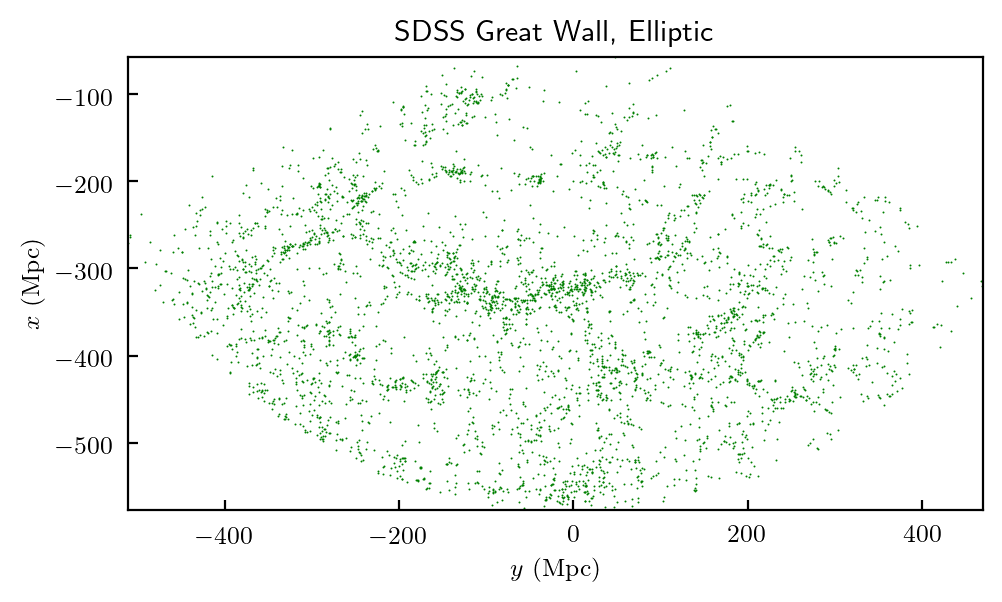

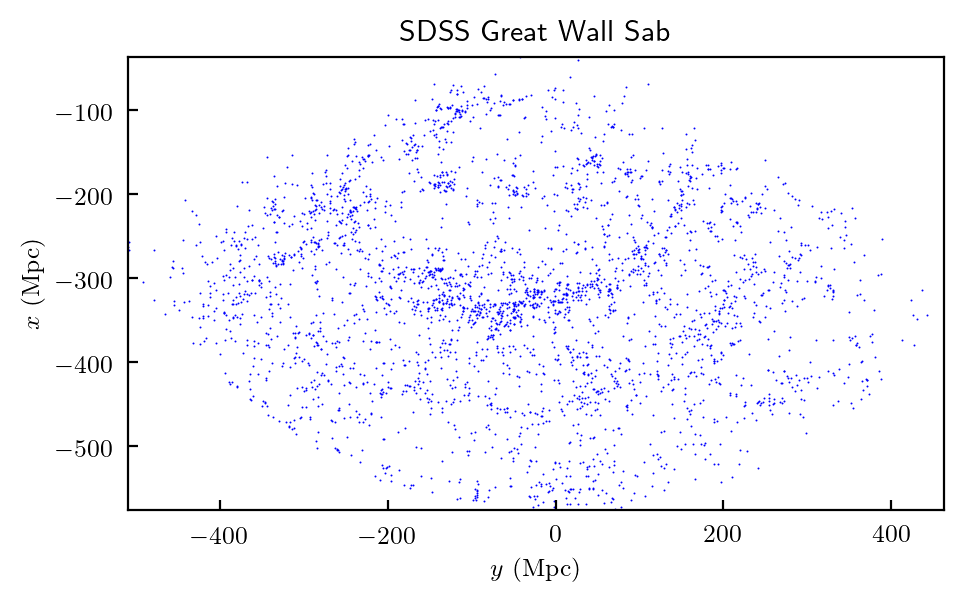

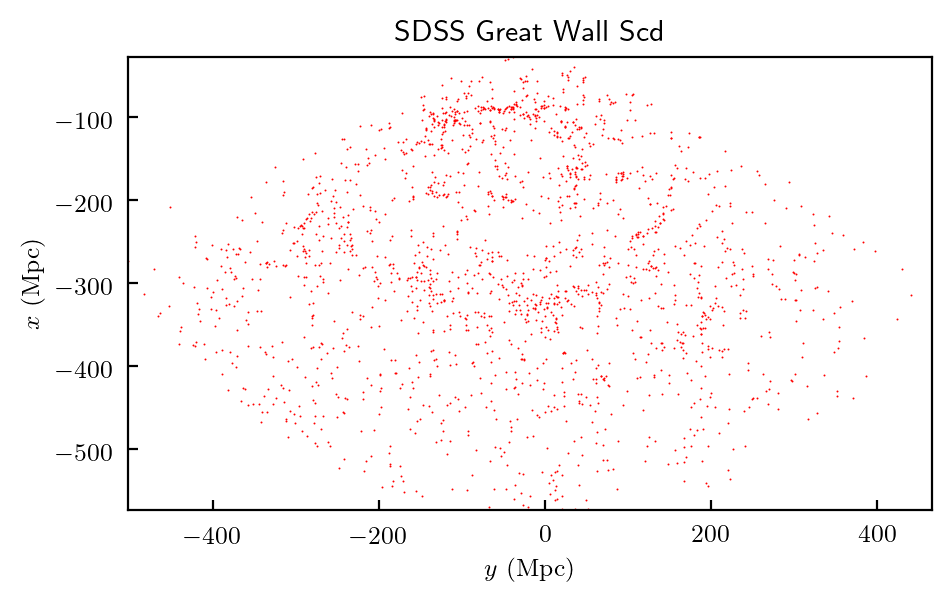

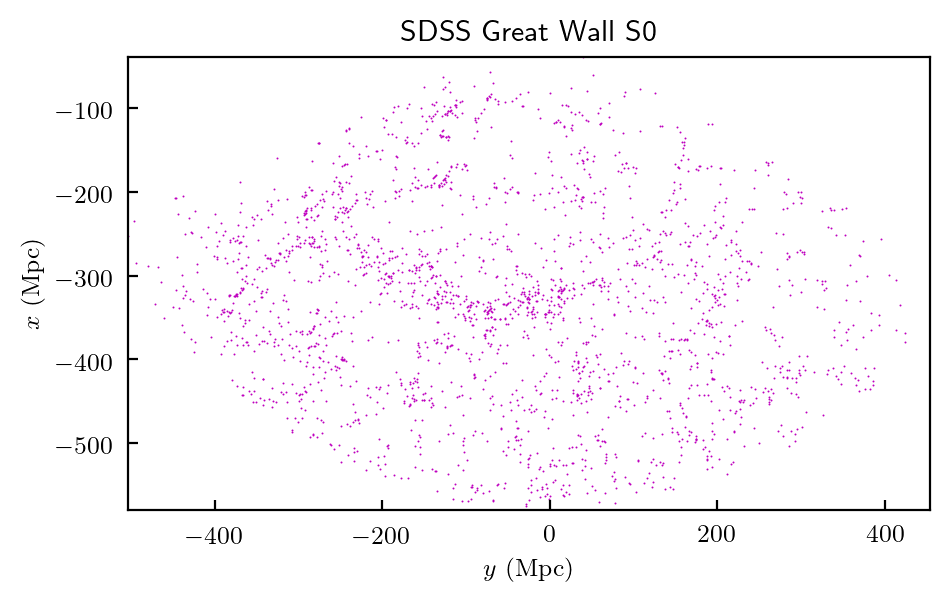

In [6]:
Mlim = -10

isel = (Mmeert < Mlim)

Ell = (pEll > 0.75) & isel
Sab = (pSab > 0.75) & isel
Scd = (pScd > 0.75) & isel
S0  = (pS0  > 0.75) & isel

# comoving distance (see bg01_friedmann_equations_distances notebook for information)
d_Cm = d_Lm / (1. + zm)

# Different distributions depending on Galaxy Type
plot_selected(ram[Ell], d_Cm[Ell], title='SDSS Great Wall, Elliptic', color='g')
plot_selected(ram[Sab], d_Cm[Sab], title='SDSS Great Wall Sab', color='b')
plot_selected(ram[Scd], d_Cm[Scd], title='SDSS Great Wall Scd', color='r')
plot_selected(ram[S0], d_Cm[S0], title='SDSS Great Wall S0', color='m')


UPenn version of the SDSS galaxy catalog contains probabilities of each galaxy to have a given morphology that was estimated using machine learning method trained on classifications of a subsample by professional observers. These probabilities were selected above into vectors <tt>pEll, pS0, pSab, pScd</tt>. 

You can use these probabilities to add a selection condition to subselect galaxies which are likely to be elliptical  above absolute magnitude limit, similarly to the example in the above cell: e.g., <tt>pEll[isel]</tt>, etc.

There are different choices that can be made to select galaxies of a given morphology: for example, to select galaxies likely to be elliptical, we can require that <tt>pEll>0.4</tt> and, possibly, also that <tt>pEll</tt> is larger than all other morphological probabilities. 
Make the choice that makes sense to you and subselect samples of elliptical and "late-type" Scd galaxies and plot their distributions in the SDSS Great Wall region side by side. 

Compare the distributions carefully and note and comment on any differences that you notice. It may be useful to zoom into particular some sub-regions to see differences better after you examine differences in the large-scale distribution. 

#### Takeway point: galaxies are biased tracers of the underlying mass distribution

Differences in spatial distributions/clustering of galaxies of different morphological types and absolute magnitudes illustrate that galaxies are *biased tracers* of the underlying mass distribution. 

Indeed, if different galaxy samples are distributed differently, they cannot all trace the same underlying mass distribution. 

The difference between clustering of galaxies or their parent dark matter halos is often quantified using **bias factor**, defined as the ratio of galaxy correlation functions, power spectra, or rms variance at some large scale. 

#### Possible extra explorations

Feel free to explore other regions of SDSS by using different cuts in RA, DEC and redshifts, to get a sense of the typical structures in galaxy distribution.

## Understanding growth (or non-growth) of structures in different cosmologies

**Background.** During the first and second lectures on formation of structure, I discussed how initial overdensities, $\delta$, in matter distribution evolve in the linear regime ($\delta\ll 1$) and in the non-linear regime using the spherical collapse model. 

The images below show evolution of structure in a cosmological simulation of flat $\Lambda$CDM model with $\Omega_{\rm m0}=0.3$. Each image corresponds to a different time snapshot of the simulation. Each row of images shows three time snapshots spanning a period of time during which expansion factor of the universe, $a(t)$, approximately doubles. I.e. $a(t)$ doubles between leftmost and rightmost images in each row.  

The simulation cube is shown as a wireframe box and has the *comoving* size of 85 Mpc. The $\delta$ field is shown in *comoving coordinates* - i.e., overall expansion of the universe is taken out, so that box has the same apparent size at all epochs. 
The color and its intensity are proportional to the logarithm of the local matter overdensity, $\delta$, smoothed at the simulation resolution. 

The images show a variety of structures that form in the $\Lambda$CDM model: small dense clumps of matter - the dark matter halos - that host formation of galaxies, as well as groups and clusters of such clumps that correspond to groups and clusters of galaxies in the observed galaxy distribution. Clumps, groups and clusters are also arranged in filamentary and sheet-like structures on scales of tens of Mpc. The entire distribution of $\delta$ has a "web-like" appearance and is often called the *cosmic web.*

**The goal** of this exercise is to strengthen your qualitative understanding of how structures in matter distribution evolve in the Cold Dark Matter (CDM) hierarchical structure formation models, such as the $\Lambda$CDM modelled by the shown simulation, and help you with processing and retention of material in the first two lectures. 

**Tasks.**

Examine distribution of matter overdensity $\delta$ at different redshifts shown in the images below and think about and answer the following question. 

* First examine evolution of matter distribution on scales of tens of Mpc during earliest snapshots shown below (from left to right) $z=7$, $z=5$, $z=4$: 

<table>
<tr>
<td><img width=350 src="img/L60/l60_a0.122_red2.png"></img></td>
<td> <img width=350 src="img/L60/l60_a0.167_red2.png"></img></td>
<td><img width=350 src="img/L60/l60_a0.200_red2.png"></img></td>
</tr></table>

What are the main features of the evolution? Does the overall morphology (i.e., location, shape, and size) of overdense (bright) and underdense (dark) region change with time (i.e., decreasing $z$)? Briefly explain the evolution you see in these snapshots qualitatively, using material of lecture 1. 

* Next examine snapshots (from left to right) $z=3$, $z=2$, $z=1$ below:
<table>
<tr>
<td><img width=350 src="img/L60/l60_a0.250_red2.png"></img></td>
<td> <img width=350 src="img/L60/l60_a0.333_red2.png"></img></td>
<td><img width=350 src="img/L60/l60_a0.500_red2.png"></img></td>
</tr></table>

Does the overall morphology and location of overdense (bright) and underdense (dark) region change with time at these redshifts? How does the evolution of $\delta$ in these snapshots differ from the evolution at $z=4-7$?
Briefly explain the evolution you see in these snapshots qualitatively, using material of lectures 1. 

* Finally, examine evolution of the $\delta$ field in the snapshots (from left to right) $z=1$, $z=0.5$, $z=0$:

<table>
<tr>
<td><img width=350 src="img/L60/l60_a0.500_red2.png"></img></td>
<td> <img width=350 src="img/L60/l60_a0.667_red2.png"></img></td>
<td><img width=350 src="img/L60/l60_a1.000_red2.png"></img></td>
</tr></table>

Compare evolution of structures on scales of tens of Mpc at these redshifts to that at $z=3-1$ above and note and discuss any differences you notice. 
Does the overall morphology (i.e., location, shape, and size) of overdense (bright) and underdense (dark) region change with time at these redshifts? Explain qualitatively possible reasons for evolution or non-evolution of these large-scale structures. 

**Hints.** When thinking about qualitative features of evolution of large-scale structures in the $\delta$ field it should be helpful to consider evolution of overdensities of different $\delta$ in 1) linear vs non-linear regime, 2) $\delta>0$ vs $\delta<0$, 3) whether perturbation of any $\delta$ can grow at any given time. 

Below you can find code that plots that may be helpful in your thinking about answers to the questions above. The first plot shows linear growth factor functions in the Einstein-de Sitter ($\Omega_{\rm m}=1$) model and in the $\Lambda$CDM model with cosmological parameters of the simulation shown above. 

In [7]:
from colossus.cosmology import cosmology

# set cosmology parameters for the three models
par_eds = {'flat': True, 'H0': 70.0, 'Om0': 1.0, 'Ob0': 0.049, 'relspecies': False, 
             'sigma8': 0.8, 'ns': 0.968}
par_lcdm = {'flat': True, 'H0': 70.0, 'Om0': 0.3, 'Ob0': 0.049, 
             'sigma8': 0.8, 'ns': 0.968}

cosmo_eds  = cosmology.setCosmology('cosmo_eds', par_eds )
cosmo_lcdm = cosmology.setCosmology('cosmo_lcdm', par_lcdm )


In [8]:
# set a grid of redshifts
amin = 1.e-3; amax = 1.; nz=200
laexp = np.linspace(np.log10(amin), np.log10(amax), nz)
z1 = 10.**(-laexp) 
z = z1 - 1. 

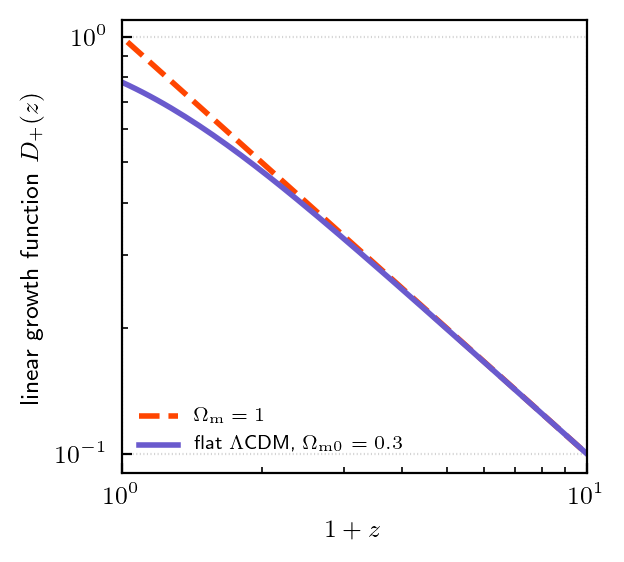

In [9]:
#plot
plt.figure(figsize=(3,3))
plt.xlabel('$1+z$')
plt.ylabel(r'linear growth function $D_+(z)$')
plt.yscale('log'); 
plt.xscale('log')
plt.xlim(0.999, 10.); plt.ylim(9.e-2,1.1)
plt.plot(z1, cosmo_eds.growthFactorUnnormalized(z), ls='--', lw=2., color='orangered', label=r'$\Omega_{\rm m}=1$')
plt.plot(z1, cosmo_lcdm.growthFactorUnnormalized(z), lw=2., color='slateblue', label=r'flat $\Lambda$CDM, $\Omega_{\rm m0}=0.3$')
plt.grid(ls='dotted', c='lightgray')
plt.legend(frameon=False, loc='lower left', fontsize=7)
plt.show()

As shown in the <a href="bg01_friedmann_equations_distances.ipynb">bg01_friedmann_equations_distances.ipynb </a> notebook, evolution of dimensionless matter density (in units of the critical density) is given by the following equation

$$\Omega_{\rm m}(z)=\frac{\bar{\rho}_{\rm m}(z)}{\rho_{\rm crit}(z)}=\frac{\Omega_{\rm m0}\,(1+z)^{3}}{\Omega_{\rm m0}\,(1+z)^3 + \Omega_{k0} (1+z)^2 +\Omega_{\Lambda 0}},$$

where $\Omega$'s with subscripts $0$ indicate their values at $z=0$, and $\Omega_{\rm k0}=1-\Omega_{\rm m0}-\Omega_{\Lambda0}$.

The equation shows that at early epochs (larger $z$), $\Omega_{\rm m}(z)$ will approach $1$ regardless of the value of $\Omega_{\rm m0}$. Clearly, $\Omega_{\rm m}=1$ at all redshifts in the $\Omega_{\rm m0}=1$, $\Omega_{\rm \Lambda0}=0$ Einstein-de Sitter cosmology at all $z$. Evolution of $\Omega_{\rm m}(z)$ in the flat $\Lambda$CDM model with $\Omega_{\rm m0}=0.3$ used in the simulation shown above can be seen in the plot below. 

In [10]:
def Omega_z1(z1, Om0, OmL0):
    """
    parameters:
    -----------
    z1: float or numpy float vector = (1+z)
    Om0, OmL0: floats, values of Omega_m and Omega_L at z=0
    Returns:
    --------
    Omega_m(z): the same dimensions as z1
    """
    Omk0 = 1. - Om0 - OmL0 
    return Om0*z1**3/(Om0*z1**3 + Omk0*z1**2 + OmL0)

Om0 = 0.3; OmL0 = 0.7; 

Omz = Omega_z1(z1, Om0, OmL0)

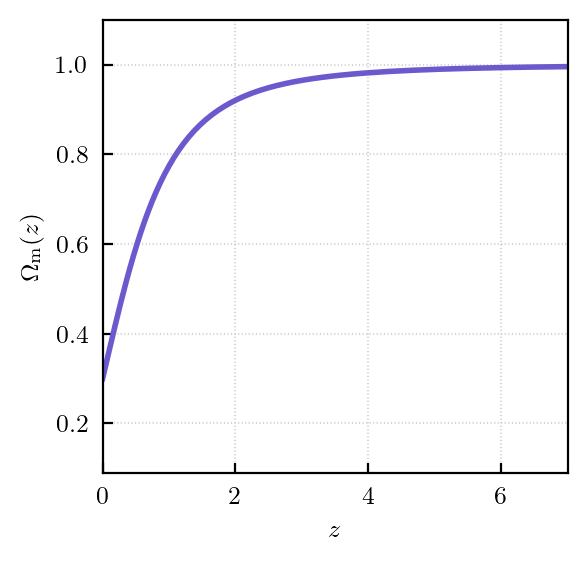

In [11]:
plt.figure(figsize=(3,3))
plt.xlabel('$z$')
plt.ylabel(r'$\Omega_{\rm m}(z)$')
plt.xlim(0., 7.); plt.ylim(9.e-2,1.1)
plt.plot(z, Omz, lw=2., color='slateblue')
plt.grid(ls='dotted', c='lightgray')
plt.show()

### Modelling mass accretion histories of halos collapsing from initial density field

**Background.** We can use equation for the collapse time, or redshift, predicted by the spherical collapse model (see l02 notebook):
$$\delta_i\,\frac{D_+(t_{\rm coll})}{D_+(t_i)}=\delta_{\rm c}$$

to predict collapse times of shells of different radii $r$ that form a spherical perturbation with profile $\delta(<r)$. 

Assuming that $\delta_{i0}(<r_i)=\delta_i/D_+(t_i)$ is the initial overdensity profile linearly axtrapolated to $z=0$, $r_i$ is *comoving* radius of the initial shell, and growth function is normalized to one at $z=0$, i.e. $D_+(z=0)=1$, we can write:

$$\delta_{i0}(<r_i)D_+(z_{\rm coll})=\delta_{\rm c}$$

This is an implicit equation for $z_{\rm coll}$, which can be solved numerically for arbitrary cosmology. 

For $\Omega_{\rm m}=1$, $\Omega_\Lambda=0$ cosmology (often called the Einstein-de Sitter model): $D_+(z)=(1+z)^{-1}$, so equation can be solved for $z_{\rm coll}$ analytically: 

$$z_{\rm coll} = \frac{\delta_{i0}(<r_i)}{\delta_c} - 1$$

Note that even in the concordance $\Lambda$CDM model $\Omega_{\rm m}\approx 1$ at $z>2$ and the above equation provides a useful approximation for the collapse at large $z$ in such model. 

Once $z_{\rm coll}$ is computed for a given shell $r_i$, the mass it encloses

$$M(<r_i)=\frac{4\pi}{3}\,\bar{\rho}_{\rm m0}\,[1+\delta(<r_i)]\,r_i^3 $$

has collapsed by $z_{\rm coll}$. 

Vectors of $z_{\rm coll}(r_i)$ (or $t_{\rm coll}$ - age of the universe at $z_{\rm coll}$) and $M(<r_i)$ for all shells comprise the mass collapse history of the peak. 

In analyses of collapse and evolution of dark matter halos in cosmological simulations, these are called *halo mass accretion history (MAH)*. We could predict such MAH for a peak using the model outlined above if we are given $\delta_{i0}(<r_i)$ profile.

#### Initial density profiles of peaks in Gaussian peaks of a given $\delta_R=\delta(<R)$

For a Gaussian field with a given power spectrum, $P(k)$, we can calculate the mean (over all space)  $\delta_r=\delta(<r)$ for each point in space, under condition that for the same point overdensity within some other $R$ is $\delta_{R\ast}=\delta(<R)$. 

The pdf of $\delta_r$ given $\delta_{R\ast}$ is a conditional Gaussian pdf $p(\delta_r\vert\delta_R)$ and the average $\delta_r$ for a given radius $r$ is given by the expectation value (mean) of this conditional pdf: 

$$\langle\delta_r\vert\delta_{R\ast} \rangle = \frac{\langle \delta_r\delta_R\rangle}{\langle\delta^2_R\rangle} \delta_{R\ast},$$

where $\langle\delta^2_R\rangle$ is the usual variance of the Gaussian field smoothed on scale $R$ with tophat filter $W_{\rm TH}$ (see <a href="bg01_statistics_density_perturbations.ipynb">bg01_statistics_density_perturbations.ipynb</a> notebook for details):

$$\langle \delta_R^2\rangle=\frac{1}{2\pi^2}\int P(k)\vert W^2_{\rm TH}(k,R)\vert k^2 dk.$$

and 

$$\langle\delta_r\delta_R\rangle = \frac{1}{2\pi^2}\int P(k)\vert W_{\rm TH}(k,r)W_{\rm TH}(k,R)\vert k^2 dk.$$


The variance around the mean $\langle\delta_r\vert\delta_{R\ast} \rangle$  is given by 

$$\sigma^2_{\delta_r\vert \delta_{R\ast}}=\langle \delta_r^2\rangle - \frac{\langle \delta_r\delta_R\rangle^2}{\langle\delta_R^2\rangle}.$$



### Code to compute average profile of a Gaussian peak smoothed on a given scale. 

Calculation is based on the equations above (derived in <a href="http://adsabs.harvard.edu/abs/1986ApJ...304...15B">Bardeen et al. 1986</a>, <a href="http://adsabs.harvard.edu/abs/1987ApJ...318...15R">Ryden & Gunn 1987</a>, and <a href="http://adsabs.harvard.edu/abs/2010arXiv1010.2539D">Dalal et al. 2010</a>).

In [12]:
from codes.variances import delta_variance, dvars, ddvars
from colossus.halo.mass_so import M_to_R
from colossus.lss import peaks

def compute_ave_dpro_for_deltaR(cosmo, MR, dRstar, ri, verbose=False):
    rtol = 1.e-8

    RTH = peaks.lagrangianR(MR*cosmo.h)
    if verbose: 
        zd = 0.
        print("R200m = %.3f kpc at z = %.3f"%(M_to_R(MR*cosmo.h, zd, '200m')/cosmo.h, zd))
        print("R_TH = %.3f comoving Mpc"%(RTH/cosmo.h))

    dRR = delta_variance(RTH, RTH, func=dvars, rtol=rtol, cosmo=cosmo)

    dlproave = np.zeros_like(ri)
    vardlproave = np.zeros_like(ri)

    for ir, rd in enumerate(ri):
        # <delta_r^2>
        var   = delta_variance(rd, rd, func=dvars, rtol=rtol, cosmo=cosmo)
        # <delta_r x delta_R>
        vardd = delta_variance(rd, RTH, func=ddvars, rtol=rtol, cosmo=cosmo)
        # average delta(<r) profile using equation above 
        dlproave[ir] = vardd / dRR * dRstar
        # variance about the average profile, can't be <0
        vardlproave[ir] = np.maximum(0., var - vardd**2 / dRR)

    return dlproave, vardlproave

In [13]:
from colossus.cosmology import cosmology

# define a vector of cosmological parameters:    
wmap_bolshoi_cosmo = {'flat': True, 'H0': 70.0, 'Om0': 0.27, 'Ob0': 0.0469, 'sigma8': 0.82, 'ns': 0.95}
# set my_cosmo to be the current cosmology
cosmo = cosmology.setCosmology('wmap_bolshoi_cosmo', wmap_bolshoi_cosmo)
cosmo.interpolation = True

In [14]:
MTH = 2e12 # assumed mass within R in Msun
dRstar = 1.6*1.69
RTH = peaks.lagrangianR(MTH*cosmo.h)
rmin = 1.e-3*RTH; rmax = 5.*RTH
lri = np.linspace(np.log10(rmin),np.log10(rmax), 100)
ri = 10.0**lri; 

# compute the conditional <delta_r | delta_R*> profile 

dlproave, vardlproave = compute_ave_dpro_for_deltaR(cosmo, MTH, dRstar, ri)

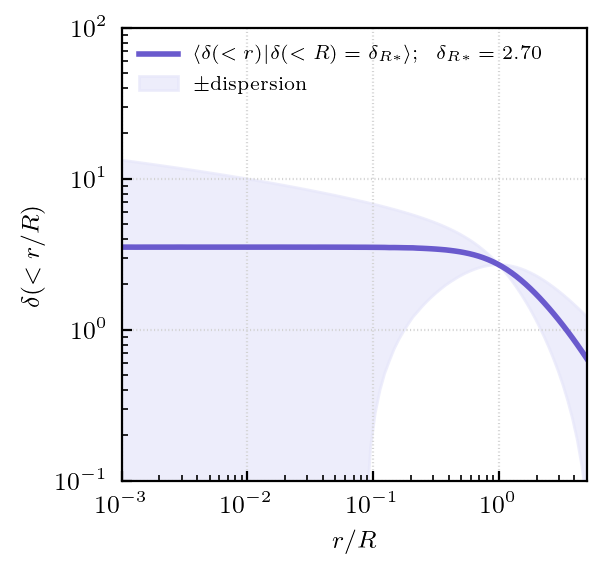

In [15]:
plot_pretty(dpi=200)
fig = plt.figure(figsize=(3.,3.))
plt.xlabel(r'$r/R$')
plt.ylabel(r'$\delta(<r/R)$')
plt.xlim(1.e-3, 5.); plt.ylim(1.e-1,1.e2)
plt.xscale('log'); plt.yscale('log')

sdlpro = np.sqrt(vardlproave[dlproave>0])
plt.fill_between(ri[dlproave>0]/RTH, dlproave[dlproave>0]-sdlpro, dlproave[dlproave>0]+sdlpro, 
                 color='lavender', alpha=0.7, label=r'$\pm\mathrm{dispersion}$')
plt.plot(ri[dlproave>0]/RTH, dlproave[dlproave>0], lw=2, c='slateblue', 
         label=r'$\langle\delta(<r)\vert\delta(<R)=\delta_{R\ast}\rangle;\ \ \delta_{R\ast}=%.2f$'%(dRstar))

plt.legend(frameon=False, loc='upper left', fontsize=7)
plt.grid(ls=':', c='lightgray')
plt.show()


**Task 1.** Using radii <tt>ri</tt> and computed vector of overdensities <tt>dlproave</tt> comprising the average $\langle\delta(<r_i)\vert \delta_{R\ast}\rangle$ profile, write code to predict the mass accretion history of an overdensity with such profile using the growth factor function of Colossus, as shown below. 

**Hint.** You can write a function solving equation for $z_{\rm coll}$ numerically using scipy's function <a href="https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.fsolve.html">fsolve</a> for example. However, a much simpler route is to tabulate $D_+(z)$ for a grid of redshifts $z$ (as shown below) and then construct interpolating spline (using, for example, <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.UnivariateSpline.html">UnivariateSpline</a> routine) of $z$ as a function of $D_+(z)$, so that one can use the spline to give $z$ for any input $D_+$ value.  

If you find the above to be difficult within limited amount of time, you can use a rough approximation for $\Omega_{\rm m}=1$ cosmology provided above to compute MAH. The accuracy of this approximation is sufficient to get the right qualitive picture. 

In [16]:
zmax = 200.; zmin = 0.; nzg = 1000
zg = np.linspace(zmax, zmin, nzg)
# corresponding age of the universe at zg
#overdensity required to collapse by zg
Dgr = cosmo.growthFactor(zg)

**Task 2.** code snippet below reads in and plots mass accretion histories of a small, but representative sample of halos measured in a cosmological simulation of $\Lambda$CDM model. Compare prediction of the model computed in part 1 to these MAHs. The best is to overplot model prediction over simulation MAHs in the same plot. 

Discuss the differences and your best guesses as to why the differences arise. 

In [17]:
from codes.read_mah import read_halos

mah_fname = 'data/MAH_M4e12_N20_L125.dat'
halos = read_halos(mah_fname)


In [18]:
import matplotlib.ticker as mtick

def plot_mah(tmin, tmax, Mmin, Mmax, halos=None):  
    """
    Plot mass accretion histories of halos from a LCDM simulation
    
    Parameters:
    -----------
    tmin, tmax: floats; minimum and maximumm time (age of the universe) to plot in Gyrs
    Mmin, Mmax: floats; minimum and maximum mass to plot in Msun
    halos: an object with halo list along with their properties
    
    """
    fig, ax = plt.subplots(1,1, figsize=(3,3))    
    xlims = [tmin, tmax]; ylims = [Mmin, Mmax]
    ax.set_xlim(xlims); ax.set_ylim(ylims)
    ax.set_xscale('log'); ax.set_yscale('log')
    ax.set_xlabel(r'$t\ \rm (Gyr)$'); ax.set_ylabel(r'$M(t)\ (M_\odot)$')
    # plot corresponding R scale at the top
    ax2 = ax.twiny()
    ax2.set_xscale('log')
    ax2.xaxis.set_major_formatter(mtick.FormatStrFormatter(r'$%.1f$'))

    zmin = 1.+cosmo.age(tmin, inverse=True); zmax = 1.+cosmo.age(tmax, inverse=True)
    ax2.set_ylim(ylims); ax2.set_xlim(zmin, zmax)
    ax2.set_xlabel(r'$1+z$')
    
    if halos != None: 
        tminmax = -1.
        for i, hd in enumerate(halos): 
            mvir = hd.mvir
            aexp = hd.scale_factor
            zh = 1./aexp - 1.
            th = cosmo.age(zh)
            tminmax = np.maximum(tminmax, th[0])
            ax.plot(th, mvir, c='slateblue', lw = 1.0)

    ax.grid(ls=':', c='lightgray')
    plt.show()

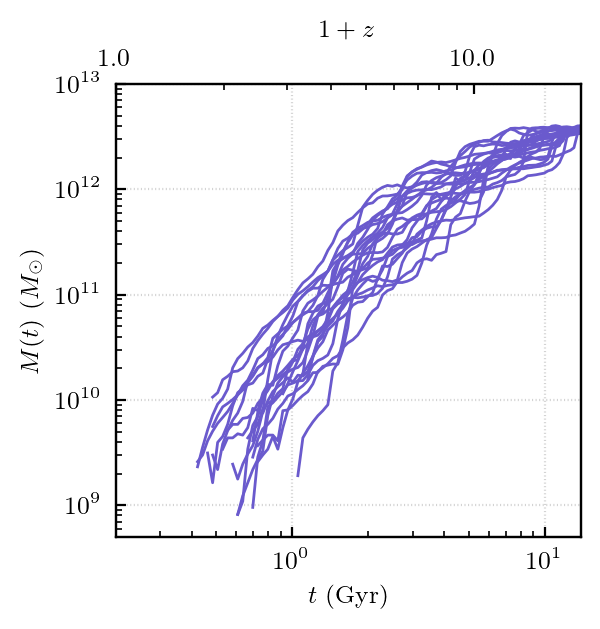

In [19]:
tmin = 0.2; tmax = cosmo.age(0.0)
Mmin = 5.e8; Mmax = 1.e13

plot_mah(tmin, tmax, Mmin, Mmax, halos=halos)